<a href="https://colab.research.google.com/github/Series-Parallel/Machine_in_Learning/blob/main/SVM_RBF_Kernel.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as colors
from sklearn.utils import resample
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import scale
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.decomposition import PCA

In [ ]:
df = pd.read_excel("default of credit card clients.xls", header=1)

In [ ]:
df.head()


,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [ ]:
df.rename({'default payment next month' : 'DEFAULT'}, axis='columns', inplace=True)
df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,DEFAULT
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [ ]:
df.drop('ID', axis=1, inplace=True)
df.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,DEFAULT
0,20000,2,2,1,24,2,2,-1,-1,-2,...,0,0,0,0,689,0,0,0,0,1
1,120000,2,2,2,26,-1,2,0,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,90000,2,2,2,34,0,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,50000,2,2,1,37,0,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,50000,1,2,1,57,-1,0,-1,0,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


## Missing data?

In [ ]:
df.dtypes

,0
LIMIT_BAL,int64
SEX,int64
EDUCATION,int64
MARRIAGE,int64
AGE,int64
PAY_0,int64
PAY_2,int64
PAY_3,int64
PAY_4,int64
PAY_5,int64




1.   **Limit_Bal**: the amount of available balance
2.   **Sex**: Category
      * 1 = male
      * 2 = female
3. **Education**: Category
      * 1 = graduate school
      * 2 = university
      * 3 = high school
      * 4 = other





In [ ]:
df['SEX'].unique()

array([2, 1])

In [ ]:
df['EDUCATION'].unique()

array([2, 1, 3, 5, 4, 6, 0])

In [ ]:
df['MARRIAGE'].unique()

array([1, 2, 3, 0])

In [ ]:
len(df.loc[(df['EDUCATION'] == 0) | (df['MARRIAGE'] == 0)])

68

In [ ]:
len(df)

30000

In [ ]:
df_no_missing = df.loc[(df['EDUCATION'] != 0) & (df['MARRIAGE'] != 0)]

In [ ]:
len(df_no_missing)

29932

In [ ]:
df_no_missing['EDUCATION'].unique()

array([2, 1, 3, 5, 4, 6])

In [ ]:
df_no_missing['MARRIAGE'].unique()

array([1, 2, 3])

## DownSample the data

29932 sample is relatively large number for a SVM, so we will downsample it. To make sure  we get 1000 of each category, we start by splitting the data into two dataframes, one for people that did not default and one for people who did!

In [ ]:
df_no_default = df_no_missing[df_no_missing['DEFAULT'] == 0]
df_default = df_no_missing[df_no_missing['DEFAULT'] == 1]

In [ ]:
df_no_default_downsampled = resample(df_no_default, replace=False, n_samples=1000, random_state=42)
len(df_no_default_downsampled)

1000

In [ ]:
df_default_downsampled = resample(df_default, replace=False, n_samples=1000, random_state=42)
len(df_default_downsampled)

1000

In [ ]:
df_downsampled = pd.concat([df_no_default_downsampled, df_default_downsampled])

In [ ]:
len(df_downsampled)

2000

## Format Data Part1: Split the data into dependent and independent variables


1. The columns of data that will use to make classifications
2. The column data we want to predict

In [ ]:
X = df_downsampled.drop('DEFAULT',axis=1).copy()
X.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
641,130000,2,3,1,28,0,0,0,0,-2,...,50000,0,0,0,2500,1000,0,0,0,0
4678,170000,1,3,1,29,0,0,0,0,0,...,172307,35234,32869,33862,7200,7500,1200,1200,1500,1300
16004,180000,2,2,1,29,0,0,0,0,0,...,26310,26662,26166,26176,1800,1800,1500,1056,950,1000
22974,210000,2,2,2,32,-2,-2,-2,-2,-2,...,410,0,0,0,979,412,0,0,0,0
17535,190000,2,3,1,45,0,0,0,0,0,...,80548,81778,83082,84811,3300,3331,3359,2663,2751,3000


In [ ]:
y = df_downsampled['DEFAULT'].copy()
y.head()

,DEFAULT
641,0
4678,0
16004,0
22974,0
17535,0


## Format the data Part 2 :  One-hot encoding

first we will do it for only Marraige column so that we can understand how one-hot encoding works!

In [ ]:
pd.get_dummies(X, columns = ['MARRIAGE'], dtype=int).head()

,LIMIT_BAL,SEX,EDUCATION,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,...,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,MARRIAGE_1,MARRIAGE_2,MARRIAGE_3
641,130000,2,3,28,0,0,0,0,-2,-2,...,0,2500,1000,0,0,0,0,1,0,0
4678,170000,1,3,29,0,0,0,0,0,0,...,33862,7200,7500,1200,1200,1500,1300,1,0,0
16004,180000,2,2,29,0,0,0,0,0,0,...,26176,1800,1800,1500,1056,950,1000,1,0,0
22974,210000,2,2,32,-2,-2,-2,-2,-2,-2,...,0,979,412,0,0,0,0,0,1,0
17535,190000,2,3,45,0,0,0,0,0,0,...,84811,3300,3331,3359,2663,2751,3000,1,0,0


In [ ]:
X_encoded = pd.get_dummies(X, columns = ['SEX', 'EDUCATION', 'MARRIAGE', 'PAY_0', 'PAY_2',  'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6'], dtype=int)

In [ ]:
X_encoded.head()

,LIMIT_BAL,AGE,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,...,PAY_5_7,PAY_6_-2,PAY_6_-1,PAY_6_0,PAY_6_2,PAY_6_3,PAY_6_4,PAY_6_5,PAY_6_6,PAY_6_7
641,130000,28,100143,50456,50000,0,0,0,2500,1000,...,0,1,0,0,0,0,0,0,0,0
4678,170000,29,165027,168990,172307,35234,32869,33862,7200,7500,...,0,0,0,1,0,0,0,0,0,0
16004,180000,29,25781,26000,26310,26662,26166,26176,1800,1800,...,0,0,0,1,0,0,0,0,0,0
22974,210000,32,355,975,410,0,0,0,979,412,...,0,1,0,0,0,0,0,0,0,0
17535,190000,45,76433,78472,80548,81778,83082,84811,3300,3331,...,0,0,0,1,0,0,0,0,0,0


## Format the data Part3: Centering and Scaling

In [ ]:
X_train, X_test, y_trian, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)
X_train_scaled = scale(X_train)
X_test_scaled = scale(X_test)

## Build a preliminary  support vector machine

In [ ]:
clf_svm = SVC(random_state=42)
clf_svm.fit(X_train_scaled, y_trian)

SVC(random_state=42)

ok we've built svm for classification. Lets see how it performs on the Testing Dataset and draw a confusion matrix

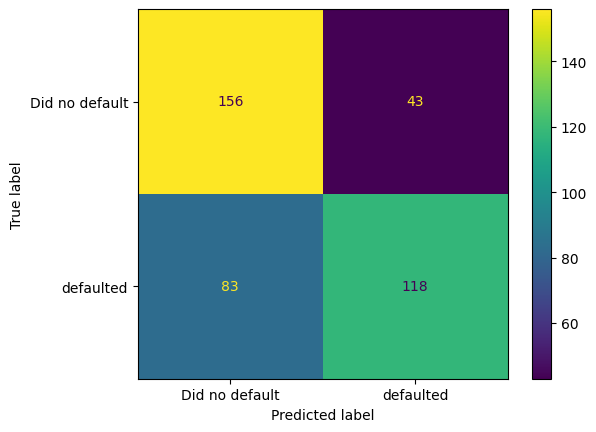

In [ ]:
# Make predictions on the test set
y_pred = clf_svm.predict(X_test_scaled)

# Generate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix using ConfusionMatrixDisplay
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Did no default','defaulted'])
disp.plot(values_format='d')
plt.show()

this is not good! so we will optimize the support vector machine using cross validation

## Optimize Parameters with Cross Validation and GridSearchCV()

In [ ]:
param_grid= [{'C':[0.5,1,10,100], 'gamma':['scale',1,0.1,0.01,0.001], 'kernel':['rbf']}]

In [ ]:
optimal_params = GridSearchCV(SVC(),param_grid, cv=5, scoring='accuracy',verbose=0)
optimal_params.fit(X_train_scaled, y_trian)
print(optimal_params.best_params_)

{'C': 1, 'gamma': 0.01, 'kernel': 'rbf'}


## Building, Evaluating, Drawing and Interpreting Final SVM

In [ ]:
clf_svm = SVC(random_state=42, C=1, gamma=0.01)
clf_svm.fit(X_train_scaled, y_trian)

SVC(C=1, gamma=0.01, random_state=42)

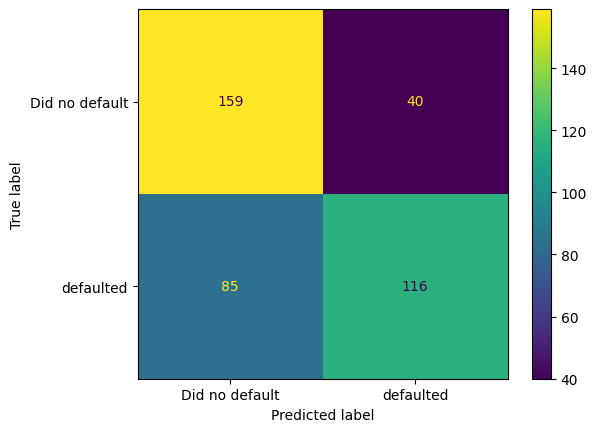

In [ ]:
# Make predictions on the test set
y_pred = clf_svm.predict(X_test_scaled)

# Generate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix using ConfusionMatrixDisplay
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Did no default','defaulted'])
disp.plot(values_format='d')
plt.show()

now we plot!

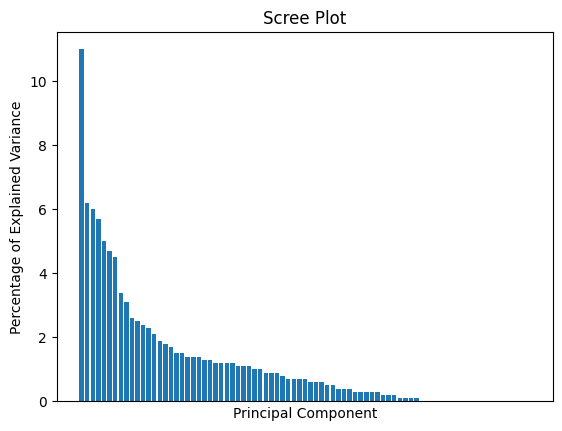

In [ ]:
pca = PCA()
X_train_pca = pca.fit_transform(X_train_scaled)

per_var = np.round(pca.explained_variance_ratio_*100, decimals=1)
labels=[str(x) for x in range(1, len(per_var)+1)]

plt.bar(x=range(1, len(per_var)+1), height=per_var)
plt.tick_params(axis='x',which='both',bottom=False,top=False, labelbottom=False)
plt.xlabel('Principal Component')
plt.ylabel('Percentage of Explained Variance')
plt.title('Scree Plot')
plt.show()

In [ ]:
train_pc1_coords = X_train_pca[:,0]
train_pc2_coords = X_train_pca[:,1]

pca_trained_scale = scale(np.column_stack((train_pc1_coords, train_pc2_coords)))

param_grid = [{'C':[0.5,1,10,100], 'gamma':['scale',1,0.1,0.01,0.001], 'kernel':['rbf']}]

optimal_params = GridSearchCV(
    SVC(), param_grid, cv=5, scoring='accuracy', verbose=0
)
optimal_params.fit(pca_trained_scale, y_trian)
print(optimal_params.best_params_)


{'C': 100, 'gamma': 0.01, 'kernel': 'rbf'}


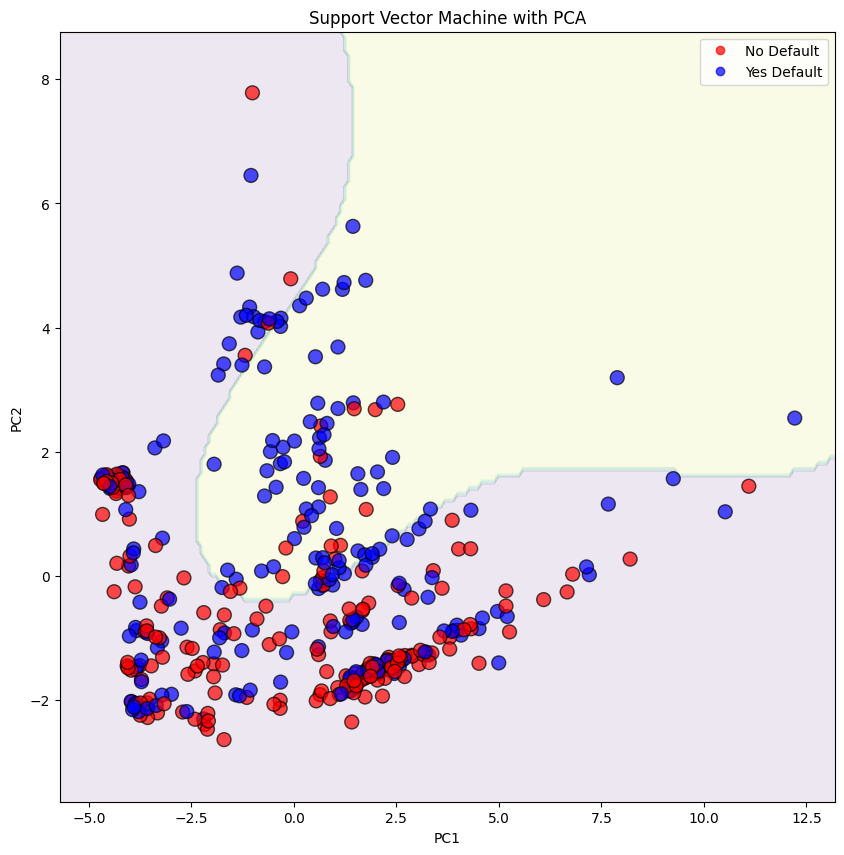

In [ ]:
clf_svm = SVC(random_state=42, C=100, gamma=0.01)
clf_svm.fit(pca_trained_scale, y_trian)

X_test_pca = pca.transform(X_test_scaled)
test_pc1_coords = X_test_pca[:,0]
test_pc2_coords = X_test_pca[:,1]

x_min = test_pc1_coords.min() - 1
x_max = test_pc1_coords.max() + 1
y_min = test_pc2_coords.min() - 1
y_max = test_pc2_coords.max() + 1

xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1), np.arange(y_min, y_max, 0.1))

Z = clf_svm.predict(np.column_stack((xx.ravel(), yy.ravel())))
Z = Z.reshape(xx.shape)

fig, ax = plt.subplots(figsize=(10,10))
ax.contourf(xx, yy, Z, alpha=0.1)

cmap = colors.ListedColormap(['red', 'blue'])
scatter = ax.scatter(test_pc1_coords, test_pc2_coords, c=y_test, cmap=cmap, s=100, edgecolors = 'k', alpha=0.7)


legend = ax.legend(scatter.legend_elements()[0],scatter.legend_elements()[1],loc = "upper right")
legend.get_texts()[0].set_text("No Default")
legend.get_texts()[1].set_text("Yes Default")

ax.set_xlabel("PC1")
ax.set_ylabel("PC2")
ax.set_title("Support Vector Machine with PCA")

plt.show()